In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import LinearModel, VoigtModel
from lmfit import minimize, Parameters

Populating the interactive namespace from numpy and matplotlib


[[Model]]
    (Model(voigt, prefix='vo1_') + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # function evals   = 101
    # data points      = 190
    # variables        = 5
    chi-square         = 64418185.249
    reduced chi-square = 348206.407
[[Variables]]
    lin_slope:       57.5318499 +/- 0.826551 (1.44%) (init= 57.40641)
    lin_intercept:   13218.7154 +/- 177.9060 (1.35%) (init= 21876.16)
    vo1_amplitude:   1.7925e+06 +/- 1.41e+04 (0.79%) (init= 40000)
    vo1_sigma:       12.5243071 +/- 0.094618 (0.76%) (init= 50)
    vo1_center:      194.451697 +/- 0.104731 (0.05%) (init= 160)
    vo1_gamma:       12.5243071 +/- 0.094618 (0.76%)  == 'vo1_sigma'
    vo1_fwhm:        45.1039127 +/- 0.340750 (0.76%)  == '3.6013100*vo1_sigma'
[[Correlations]] (unreported correlations are <  0.500)
    C(lin_slope, lin_intercept)  = -0.904 
    C(vo1_amplitude, vo1_sigma)  =  0.814 



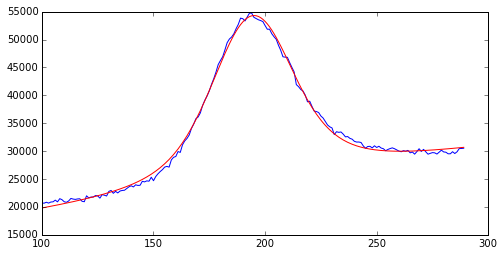

In [10]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

with open("/Users/stanpol/Dropbox/Stan-Marina/Mo3p.txt") as f:
	data = np.loadtxt(f, unpack=True)
x = np.array(range(len(data))[100:290])
y = np.array(data[::-1][100:290])

background  = LinearModel(prefix='lin_')
pars = background.guess(y, x=x)

voigt1  = VoigtModel(prefix='vo1_')
pars.update(voigt1.make_params())

pars['vo1_center'].set(160, min=100, max=250)
pars['vo1_sigma'].set(50, min=3)
pars['vo1_amplitude'].set(40000, min=20000)

mod = voigt1 + background

init = mod.eval(pars, x=x)
plt.plot(x, y)

out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

plt.plot(x, out.best_fit, 'r-')
plt.show()

[[Model]]
    ((Model(voigt, prefix='vo1_') + Model(voigt, prefix='vo2_')) + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # function evals   = 136
    # data points      = 350
    # variables        = 8
    chi-square         = 211169839.476
    reduced chi-square = 617455.671
[[Variables]]
    lin_slope:       43.2349827 +/- 0.638470 (1.48%) (init= 28.83002)
    lin_intercept:   15452.3657 +/- 186.3205 (1.21%) (init= 26992.33)
    vo1_amplitude:   1.8563e+06 +/- 1.83e+04 (0.98%) (init= 40000)
    vo1_sigma:       12.8674132 +/- 0.123878 (0.96%) (init= 50)
    vo1_center:      195.022866 +/- 0.135062 (0.07%) (init= 160)
    vo1_gamma:       12.8674132 +/- 0.123878 (0.96%)  == 'vo1_sigma'
    vo1_fwhm:        46.3395438 +/- 0.446123 (0.96%)  == '3.6013100*vo1_sigma'
    vo2_amplitude:   9.7433e+05 +/- 2.02e+04 (2.07%) (init= 40000)
    vo2_sigma:       12.9907242 +/- 0.251892 (1.94%) (init= 50)
    vo2_center:      367.516533 +/- 0.260926 (0.07%) (init= 360)
    vo2_gamma:      

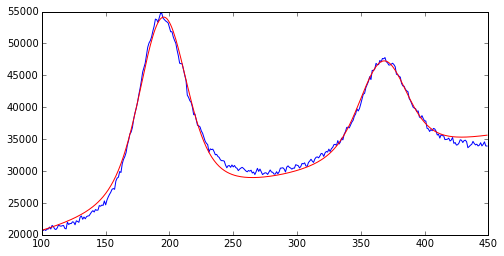

In [15]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

with open("/Users/stanpol/Dropbox/Stan-Marina/Mo3p.txt") as f:
	data = np.loadtxt(f, unpack=True)
x = np.array(range(len(data))[100:450])
y = np.array(data[::-1][100:450])

background  = LinearModel(prefix='lin_')
pars = background.guess(y, x=x)

voigt1  = VoigtModel(prefix='vo1_')
pars.update(voigt1.make_params())

pars['vo1_center'].set(160, min=100, max=250)
pars['vo1_sigma'].set(50, min=3)
pars['vo1_amplitude'].set(40000, min=20000)


voigt2  = VoigtModel(prefix='vo2_')
pars.update(voigt2.make_params())

pars['vo2_center'].set(360, min=320, max=400)
pars['vo2_sigma'].set(50, min=3)
pars['vo2_amplitude'].set(40000, min=20000)



mod = voigt1 + voigt2 + background

init = mod.eval(pars, x=x)
plt.plot(x, y)

out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

plt.plot(x, out.best_fit, 'r-')
plt.show()

[[Model]]
    (Model(skewed_gaussian, prefix='sg1_') + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # function evals   = 81
    # data points      = 70
    # variables        = 6
    chi-square         = 164653410.033
    reduced chi-square = 2572709.532
[[Variables]]
    lin_slope:       133.476982 +/- 11.05987 (8.29%) (init=-106.6406)
    lin_intercept:   33745.3738 +/- 874.7279 (2.59%) (init= 79522.97)
    sg1_amplitude:   1.9526e+06 +/- 1.75e+04 (0.90%) (init= 140000)
    sg1_sigma:       13.1068909 +/- 0.151416 (1.16%) (init= 10)
    sg1_center:      61.0443796 +/- 0.078778 (0.13%) (init= 70)
    sg1_gamma:       3.09001255 +/- 0.103694 (3.36%) (init= 4)
[[Correlations]] (unreported correlations are <  0.500)
    C(lin_slope, lin_intercept)  = -0.933 
    C(sg1_sigma, sg1_center)     = -0.776 
    C(sg1_sigma, sg1_gamma)      =  0.709 
    C(sg1_center, sg1_gamma)     = -0.619 
    C(sg1_amplitude, sg1_sigma)  =  0.602 



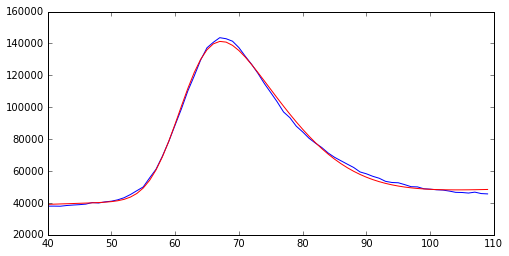

In [13]:
from lmfit.models import LinearModel, VoigtModel, SkewedGaussianModel

fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

with open("/Users/stanpol/Dropbox/Stan-Marina/O1s.txt") as f:
	data = np.loadtxt(f, unpack=True)
x = np.array(range(len(data))[40:110])
y = np.array(data[::-1][40:110])

background  = LinearModel(prefix='lin_')
pars = background.guess(y, x=x)

sg1  = SkewedGaussianModel(prefix='sg1_')
pars.update(sg1.make_params())

pars['sg1_center'].set(70, min=50, max=100)
pars['sg1_sigma'].set(10, min=3)
pars['sg1_gamma'].set(4, min=1)
pars['sg1_amplitude'].set(140000, min=50000)

mod = sg1 + background

init = mod.eval(pars, x=x)
plt.plot(x, y)

out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

plt.plot(x, out.best_fit, 'r-')
plt.show()